# ASTR596: Fundamentals of Data Science
## Week 1 In class exercise solutions - Part 5
#### Gautham Narayan <gsn@illinois.edu>

This notebook steps through the in class exercises during Week 1.
You are not required to do things this way, and indeed by the end of the semester, you'll probably have your own favorite ways to do things. That's totally OK.

In [1]:
# we use the numpy scipy and friends stack so much that it's worth just having things in the namespace
# you can do that with %pylab here
# The things that start with % are called `magics`
# There's a lot of them, and you can see the list here: 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## Slide 69: The Central Limit Theorem

There are several forms of the central limit theorem, but the one you encounter in the ICVG text book (Sec 3.4)
https://en.wikipedia.org/wiki/Central_limit_theorem#Classical_CLT

In our last exercise we saw that comparing the sample mean and variance isn't itself enough to assert that two distributions are the same, or can be approximated by a normal distribution with the corresponding mean and variance.

The central limit theorem says that if you draw N identical and independently distributed (i.i.d) random variables from a distribution with some mean $\mu$ and standard deviation $\sigma$ and compute the sample mean of these random variables, *that sample mean itself is distributed as a normal distribution* $\text{Normal}(\mu, \sigma/\sqrt{N})$.

This is kinda remarkable - we don't need to specify the details of the original distribution, just know that it has some *finite* mean and variance - but as long as we take lots of measurements, we'll be able to get an approximation of that mean with an accuracy that gets better as $\frac{1}{\sqrt{N}}$.

We should verify this behavior and see where it breaks down. 


In [2]:
import scipy.stats as st
from astropy.visualization import hist as ahist

In [3]:
# python lets you make lists of objects, including lists of functions themselves
# we'll try to verify the CLT behavior with three distributions

dists = [st.poisson, st.uniform, st.expon, st.cauchy]

# the poisson distribution needs a scale parameter specified
# the uniform distribution needs a range - we'll set it to have mean 0
# the others have sensible defaults of loc=0 and scale=1, so we'll leave them blank
dist_args = [[5,], [-0.5, 0.5], [], [] ]

In [4]:
# Now the CLT says that the accuracy gets better as a function of N
N = 3**np.arange(1, 7, 1)

# Finally, the CLT specifes that the mean itself is distributed as a Gaussian
# so taking one sample mean from N random variables isn't enough to see the behavior overall
# we will generate M samples of N variables
M = 100

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


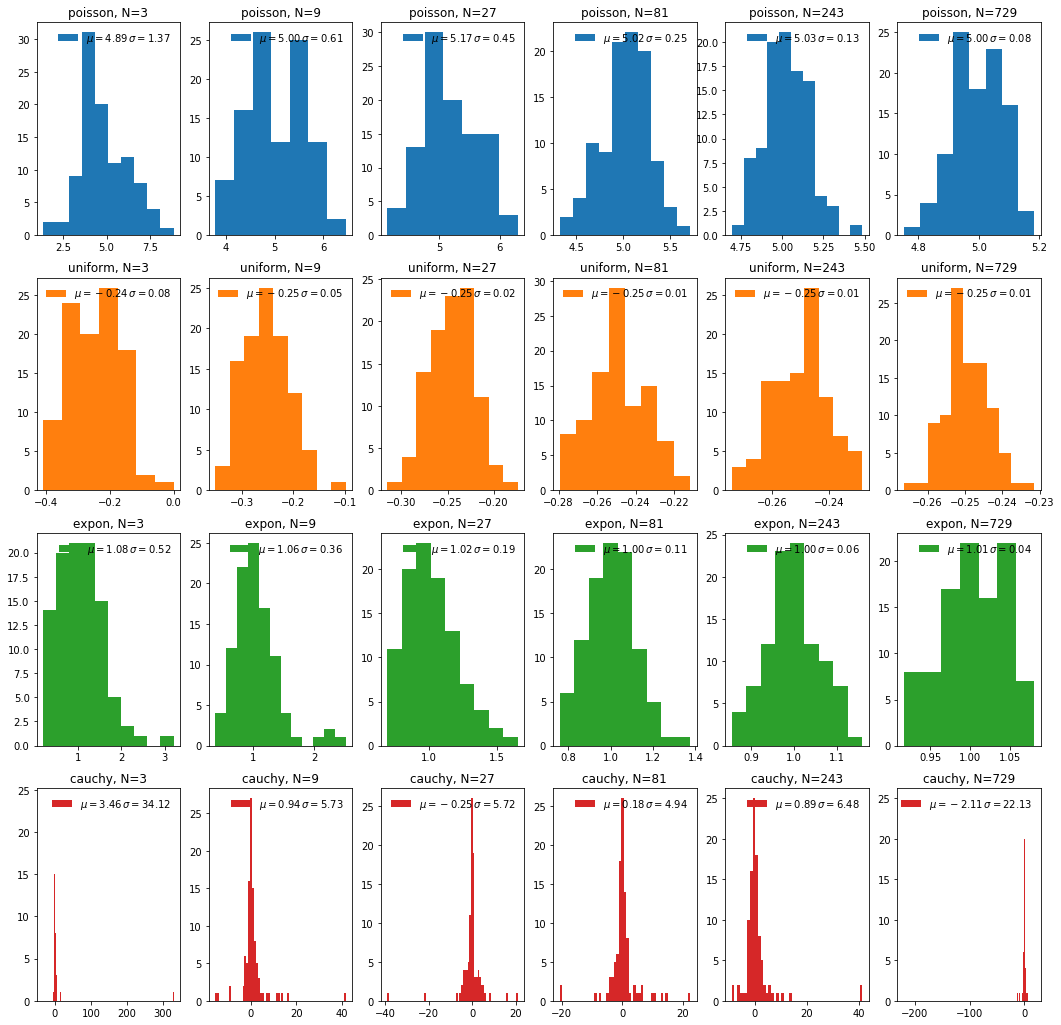

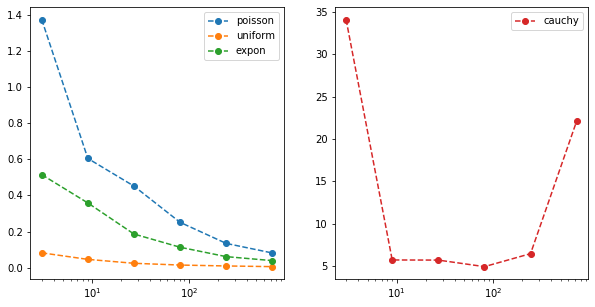

In [11]:
# we'll visualize this with a 3x3 plot showing the behavior of each distrib
fig = figure(figsize=(18, 18))

# we'll also plot the variance as a function of N 
fig2 = figure(figsize(10, 5))
ax2 = fig2.add_subplot(121)
# we're going to separate the Cauchy distribution from the others 
# for reasons that will become apparent in a few seconds
ax3 = fig2.add_subplot(122)

for i, dist in enumerate(dists):
    dist_var = []
    for j, n in enumerate(N):
        
        args = dist_args[i]
        
        # we're simulating M samples of n random variables from each distribution
        means = np.array([dist.rvs(*args, size=n).mean() for i in range(M)])
        s_mean = means.mean()
        s_std  = means.std()
        dist_var.append(s_std)
        
        # lets plot the means of each distribution at this N
        plot_idx = len(N)*i + j + 1
        label=r'$\mu={:.2f} \, \sigma={:.2f}$'.format(s_mean, s_std)
        ax = fig.add_subplot(len(dists), len(N), plot_idx)
        
        # the default matplotlib histogram impelmentation is OK
        # astropy has a better one which allows automagic binning with a few algorithms
        # we'll use the Freedman-Diaconis rule
        # this sets the bin widths based on the inter-quartile range we talked about in class
        # and the sample size
        # https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule
        
        ahist(means, bins='freedman', ax=ax, color=f'C{i}', label=label)
        title = f'{dist.name}, N={n}'
        ax.set_title(title)
        ax.legend(frameon=False)
    if i == len(dists)-1:
        ax3.plot(N, dist_var, marker='o', color=f'C{i}', linestyle='--' , label=dist.name)  
    else:
        ax2.plot(N, dist_var, marker='o', color=f'C{i}', linestyle='--' , label=dist.name)
    ax2.set_xscale('log')
    ax3.set_xscale('log')
    ax2.legend()
    ax3.legend()
    


Note that we're being sloppy and not even properly normalizing the weights of each of the sample means, but for this illustrative exercise it's fine.

Also note that the Cauchy distribution doesn't behave as the CLT says it ought to. That's because the distribution is pathalogical and violates the CLT because it doesn't have a finite variance at all. Draws from the Cauchy distribution have too many outliers because of the probability density in the tails of the distribution. 

The thing to remember is that real life often has outliers as well! We *assume* Gaussianity, but it's worth checking if that assumption actually helps describe our data. We'll do that in our next and last exercise for week 1.